# Workshop: visualization with `matplotlib`

### Wednesday, March 9, 2022

In today's workshop we'll work a little bit with `matplotlib`, the most popular Python library for visualization.
We will concentrate on the `pyplot` submodule of `matplotlib`, mostly because it is easiest to use, but please bear in mind that it `matplotlib` is a lot more than `pyplot`!

In [1]:
import matplotlib as mp
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as spstat

## Problem 1: basic plotting

Below is some (fake) data describing two years' worth of monthly sales of a few different products at a fictional cafe: ice cream, hot chocolate and coffee.

Create a plot showing the three products' sales over the two-year span, plotting the ice cream in blue, the hot chocolate in red and the coffee in green.
Include month labels on the x-axis (I've included these in a list `month` in the block below for your convenience), and label your y-axis something sensible (I haven't told you what a unit of sales is, so be as creative or uncreative as you like).
Include a legend, which you should locate outside and to the right of your plot.
You may want to adjust the weights of lines and/or points, depending on resolution and personal taste (and for the sake of practice!).

In [2]:
month = 2*['J','F','M','A','M','J','J','A','S','O','N','D']
T = len(month)
ice_cream = 2 - np.cos(2*np.pi*np.arange(T)/12) + np.random.random(T)-1/2
hot_chocolate = 3 + 2*np.sin(2*np.pi*np.arange(T)/12) + np.random.random(T)-1/2
coffee = 5 + 2*(np.random.random(T)-1/2) - hot_chocolate/4

In [63]:
# PLOTTING CODE GOES HERE.

## Problem 2: scatterplots

Here are two sets of two-dimensional data corresponding to two (fictional) groups in a study. Create a scatter plot displaying this data, coloring the `control` group blue and the `treatment` group red.
Include a legend indicating the color correspondence.

In [98]:
n=35
muctrl = np.array([-1,-1])
mutrmt = np.array([ 1, 1])
Sigma = 2*np.array( [[1,1/2],[1/2,1]] )

# Here we are creating two random variable objects, which support, among a
# number of other methods, the method .rvs, which generates draws from the distribution.
# See https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal
# for further reading.
ctrl_dist = spstat.multivariate_normal(muctrl, Sigma)
trmt_dist = spstat.multivariate_normal(mutrmt, Sigma)

# Now we draw from those two distribution objects that we created.
control = ctrl_dist.rvs( n )
treatmt = trmt_dist.rvs( n )

In [96]:
# PLOTTING CODE GOES HERE.

<b>Bonus challenge exercise:</b> Once you've got that plot looking good, adapt the code below (which was itself adapted from this demo page: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py) to create the same scatter plot but with marginal histograms, indicating the marginal x- and y-distributions of the data.

Make sure that the histograms are still colored according to control vs treatment!

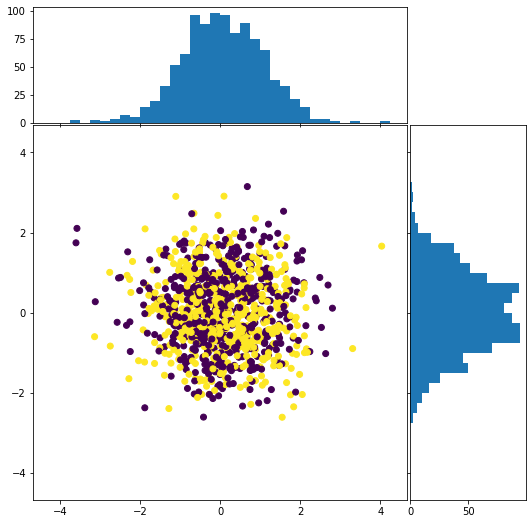

In [15]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x = np.random.randn(1000)
y = np.random.randn(1000)
colors = np.random.random(1000) > 0.5

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# Turning off labels-- you can turn these labels back on if you want.
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Creating the scatter plot
ax.scatter(x, y, c=colors)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1) * binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

plt.show()

## Problem 3: contours

As we saw in lecture, drawing contour lines in `matplotlib` is a bit complicated.

Use the contour plotting functionality to plot a black circle of radius 2 in a plot that shows x- and y-axes ranging from -3 to 3.

This example from the matplotlib documentation might be helpful. Note that you don't need to bother with any of the `ax` business-- `plt.contour(X,Y,Z)` is enough! https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html

In [2]:
#CODE GOES HERE.